In [287]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo-coco-data/yolov3.cfg
/kaggle/input/yolo-coco-data/coco.names
/kaggle/input/yolo-coco-data/yolov3.weights
/kaggle/input/imager/image2.jpeg
/kaggle/input/imager/cat.png
/kaggle/input/imager1/image3.jpg
/kaggle/input/imager1/image4.jpg


In [288]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import time

# The class names are there in coco.names files.
# The pretrained weights of YOLO are there in yolov3.weights.
# And yolov3.config is the configuration file..

In [289]:
names=open("/kaggle/input/yolo-coco-data/coco.names").read()
names

'person\nbicycle\ncar\nmotorbike\naeroplane\nbus\ntrain\ntruck\nboat\ntraffic light\nfire hydrant\nstop sign\nparking meter\nbench\nbird\ncat\ndog\nhorse\nsheep\ncow\nelephant\nbear\nzebra\ngiraffe\nbackpack\numbrella\nhandbag\ntie\nsuitcase\nfrisbee\nskis\nsnowboard\nsports ball\nkite\nbaseball bat\nbaseball glove\nskateboard\nsurfboard\ntennis racket\nbottle\nwine glass\ncup\nfork\nknife\nspoon\nbowl\nbanana\napple\nsandwich\norange\nbroccoli\ncarrot\nhot dog\npizza\ndonut\ncake\nchair\nsofa\npottedplant\nbed\ndiningtable\ntoilet\ntvmonitor\nlaptop\nmouse\nremote\nkeyboard\ncell phone\nmicrowave\noven\ntoaster\nsink\nrefrigerator\nbook\nclock\nvase\nscissors\nteddy bear\nhair drier\ntoothbrush'

In [290]:
names=names.strip().split("\n")

In [291]:
print(names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [292]:
print(len(names))

80


# Now we have got the labels and we saw that the Coco dataset consists of 80 classes..

# Now defining paths to the weights and configuration file:-

In [293]:
weights_path = '/kaggle/input/yolo-coco-data/yolov3.weights'
configuration_path = '/kaggle/input/yolo-coco-data/yolov3.cfg'

pro_min = 0.5 # Setting minimum probability to eliminate weak predictions

threshold = 0.3 # Setting threshold for non maximum suppression

# Now loading YOLO Object Detector with the help of DNN(Deep Neural Network) Library:-

In [294]:
net = cv2.dnn.readNetFromDarknet(configuration_path,weights_path)

# Getting names of all layers
layers = net.getLayerNames()  # list of layers' names

# # Check point
print(layers)

['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_2', 'bn_2', 'relu_3', 'conv_3', 'bn_3', 'relu_4', 'shortcut_4', 'conv_5', 'bn_5', 'relu_6', 'conv_6', 'bn_6', 'relu_7', 'conv_7', 'bn_7', 'relu_8', 'shortcut_8', 'conv_9', 'bn_9', 'relu_10', 'conv_10', 'bn_10', 'relu_11', 'shortcut_11', 'conv_12', 'bn_12', 'relu_13', 'conv_13', 'bn_13', 'relu_14', 'conv_14', 'bn_14', 'relu_15', 'shortcut_15', 'conv_16', 'bn_16', 'relu_17', 'conv_17', 'bn_17', 'relu_18', 'shortcut_18', 'conv_19', 'bn_19', 'relu_20', 'conv_20', 'bn_20', 'relu_21', 'shortcut_21', 'conv_22', 'bn_22', 'relu_23', 'conv_23', 'bn_23', 'relu_24', 'shortcut_24', 'conv_25', 'bn_25', 'relu_26', 'conv_26', 'bn_26', 'relu_27', 'shortcut_27', 'conv_28', 'bn_28', 'relu_29', 'conv_29', 'bn_29', 'relu_30', 'shortcut_30', 'conv_31', 'bn_31', 'relu_32', 'conv_32', 'bn_32', 'relu_33', 'shortcut_33', 'conv_34', 'bn_34', 'relu_35', 'conv_35', 'bn_35', 'relu_36', 'shortcut_36', 'conv_37', 'bn_37', 'relu_38', 'conv_38', 'bn_38', 'r

# Getting the output layers:-

In [295]:
for i in net.getUnconnectedOutLayers():
    print(layers[i[0]-1])

yolo_82
yolo_94
yolo_106


Generally in a sequential CNN network there will be only one output layer at the end. In the YOLO v3 architecture we are using there are multiple output layers giving out predictions. get_output_layers() function gives the names of the output layers. An output layer is not connected to any next layer.

In [296]:
output_layers=[layers[i[0] - 1] for i in net.getUnconnectedOutLayers()] # We are searching for unconnected layers as output layers are not connected with any layer.

print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


# So these are the output layers..

# Reading the image for Object Detection:-

In [297]:
image=cv2.imread("/kaggle/input/imager1/image4.jpg")
image1=cv2.imread("/kaggle/input/imager/image2.jpeg")
print(image.shape)

(171, 294, 3)


In [298]:
# print(image1.shape)

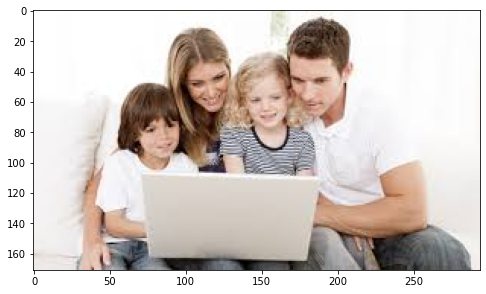

In [299]:
plt.rcParams['figure.figsize'] = (8,8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Our Image is now loaded..

# Now getting blob from Image:-

In [300]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (400,400), swapRB=True, crop=False)
# blobfromimage returns a 4 dimensional bolb

# Check point
print(image.shape)  
print(blob.shape)  
# Resulted shape has number of images, number of channels, width and height
# So (1,3,400,400)

(171, 294, 3)
(1, 3, 400, 400)


# Transposing the blob to see the blobbed image:-

(400, 400, 3)


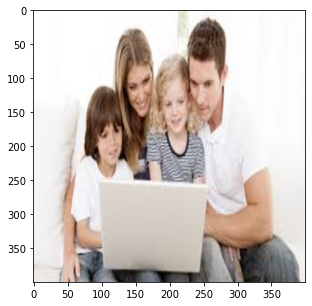

In [301]:
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1, 2,0)
print(blob_to_show.shape) 

plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(blob_to_show)
plt.show()

# Implementing forward pass with our blob and pass through the output layers..

In [302]:
print(blob.shape)

(1, 3, 400, 400)


In [303]:
net.setInput(blob) # giving blob as input to our YOLO Network.
t1=time.time()
output = net.forward(output_layers)
t2 = time.time()

# Showing spent time for forward pass
print('YOLO took {:.5f} seconds'.format(t2-t1))

error: OpenCV(4.2.0) /io/opencv/modules/dnn/src/layers/concat_layer.cpp:102: error: (-201:Incorrect size of input array) Inconsistent shape for ConcatLayer in function 'getMemoryShapes'


The EAST text requires that your input image dimensions be multiples of 32, so if you choose to adjust your --width and --height values, make sure they are multiples of 32! A we have given the width and height as 400,400 we got this error.

# The main reason we require blob from an Image:
In Image processing, blob detection refers to modules that are aimed at detecting points and/or regions in the image that differ in properties like brightness or color compared to the surrounding. There are several motivations for studying and developing blob detectors. One main reason is to provide complementary information about regions, which is not obtained from edge detectors or corner detectors.

In [305]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416,416), swapRB=True, crop=False)
# blobfromimage returns a 4 dimensional bolb

# Check point
print(image.shape)  
print(blob.shape)  
# Resulted shape has number of images, number of channels, width and height

(171, 294, 3)
(1, 3, 416, 416)


(416, 416, 3)


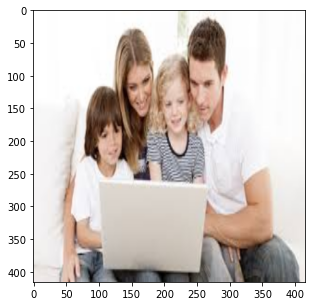

In [306]:
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1, 2,0)
print(blob_to_show.shape) 

plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(blob_to_show)
plt.show()

In [307]:
print(blob.shape)

(1, 3, 416, 416)


In [308]:
net.setInput(blob) # giving blob as input to our YOLO Network.
t1=time.time()
output = net.forward(output_layers)
t2 = time.time()

# Showing spent time for forward pass
print('YOLO took {:.2f} seconds'.format(t2-t1))

YOLO took 1.26 seconds


Successfully done after we kept the dimensions as a multiple of 32

In [309]:
print(output)

[array([[0.0482836 , 0.03439775, 0.2595451 , ..., 0.        , 0.        ,
        0.        ],
       [0.05765764, 0.03750953, 0.22670968, ..., 0.        , 0.        ,
        0.        ],
       [0.05337817, 0.02850035, 0.92489   , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9506038 , 0.94063747, 0.4242094 , ..., 0.        , 0.        ,
        0.        ],
       [0.9641911 , 0.9642404 , 0.38239494, ..., 0.        , 0.        ,
        0.        ],
       [0.9713376 , 0.9625508 , 0.8079182 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02533225, 0.02657935, 0.05830859, ..., 0.        , 0.        ,
        0.        ],
       [0.01936606, 0.02612772, 0.21270558, ..., 0.        , 0.        ,
        0.        ],
       [0.02771716, 0.01989654, 0.09175774, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97806203, 0.97559696, 0.04597094, ..., 0.        , 0.        ,
        0.        ],
       [0.9804032 

In [310]:
print(output[0][0])

[4.8283596e-02 3.4397755e-02 2.5954509e-01 1.8839444e-01 1.1968904e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

# These are the output from our YOLO pretrained model..Contains 85 values.

# Colours for Representing Object:-

In [311]:
colours = np.random.randint(0, 255, size=(len(names), 3), dtype='uint8') # randint(low, high=None, size=None, dtype='l')

print(colours.shape)
print(len(colours))
print(colours[0])  

(80, 3)
80
[ 61   2 245]


Made a list of colours with randomly RGB colour of each class.
Making so that we can distinguish every objects with different colours..

In [312]:
classes = []
confidences = []
boxes = []

In [313]:
Height = image.shape[0]
Width = image.shape[1]

In [314]:
print(Width,Height)

294 171


In [315]:
len(output)

3

In [316]:
for out in output:
    print(len(out))

507
2028
8112


# As there are 3 output layers so we are getting 3 lengths here..

In [317]:
# for out in output:
#     for res in out:
#         print(len(res))  
#     print('************************')

In [318]:
# for out in output:
#     for res in out:
#         print(len(res[5:]))  
#     print('************************')

In [319]:
# for out in output:
#      for res in out:
        
#         # print(res)
#         # Getting class for current object
#         scores = res[5:]
#         print(res[0])

# We are taking res[5:] because we have 80 classes and YOLO results to 85 clasess.
# Then getting class for current object by argmax function. Argmax function returns the indices of the maximum value in the array.


In [320]:
for out in output:
    for res in out:
        
#         print(res)
        scores = res[5:]
#         print(scores)
        class_current = np.argmax(scores) # returning indices with max score and that would be our class

        # Getting the probability for current object by accessing the indices returned by argmax.
        confidence_current = scores[class_current]

        # Eliminating the weak predictions that is with minimum probability and this loop will only be encountered when an object will be there
        if confidence_current > 0.5:
            
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format just keeps center of detected box and its width and height
            #that is why we are multiplying them elemwnt wise by width and height
            box = res[0:4] * np.array([Width, Height, Width, Height])  #In the first 4 indices only contains 
            #the output consisting of the coordinates.
            print(res[0:4])
            print(box)

            # From current box with YOLO format getting top left corner coordinates
            # that are x and y
            x, y, w, h = box.astype('int')
            x = int(x - (w / 2))
            y = int(y - (h / 2))
            

            # Adding results into the lists
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence_current))
            classes.append(class_current)          

[0.527241   0.4079936  0.19698556 0.48448774]
[155.00885153  69.76690811  57.91375396  82.84740391]
[0.73244256 0.5097846  0.33803067 0.9765216 ]
[215.338112    87.17316306  99.38101584 166.98519552]
[0.24893814 0.63244593 0.24298607 0.7257026 ]
[ 73.18781412 108.14825428  71.43790403 124.09514183]
[0.44252294 0.79385954 0.4063344  0.34157902]
[130.10174525 135.74998158 119.46231365  58.41001242]
[0.3749432  0.33732638 0.14686349 0.5008525 ]
[110.23329985  57.68281057  43.17786616  85.64578182]
[0.51688105 0.4001245  0.17779091 0.42960694]
[151.96302831  68.42128783  52.27052754  73.46278748]


# Non Max Supression:-

In [321]:
results = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.4)

# Showing labels of the detected objects
for i in range(len(classes)):
    print(names[int(classes[i])])

person
person
person
laptop
person
person


# So these are the objects detected in the Image..

In [326]:
results

array([[2],
       [3],
       [0],
       [1],
       [4]], dtype=int32)

In [322]:
results.flatten()

array([2, 3, 0, 1, 4], dtype=int32)

In [323]:
if len(results) > 0:

    for i in results.flatten():
        
        # Getting current bounding box coordinates
        x, y = boxes[i][0],boxes[i][1]
        width, height = boxes[i][2], boxes[i][3]
        
        colour_box_current = [int(j) for j in colours[classes[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image, (x, y), (x + width+20, y + height+50),
                      colour_box_current, 2)

        # Preparing text with label and confidence 
        text_box_current = '{}: {:.4f}'.format(names[int(classes[i])], confidences[i])

        # Putting text with label and confidence
        cv2.putText(image, text_box_current, (x, y+10), cv2.FONT_HERSHEY_DUPLEX, 0.4, colour_box_current)

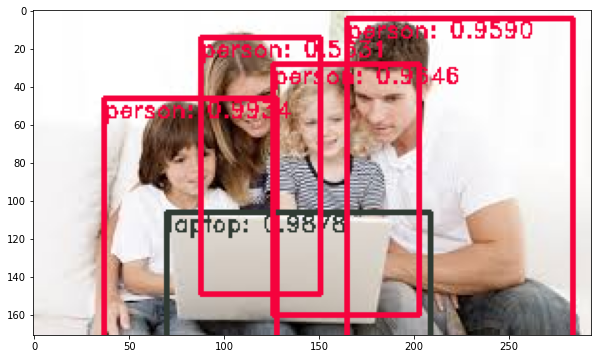

In [324]:
plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# So we are done with YOLO..